In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
DATA_PATH_SINHVIEN_DTB_HOCKY = '/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/1.dataset_cleaned/sinhvien_dtb_hocky_clean.csv'
DATA_PATH_TOTNGHIEP = '/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/1.dataset_cleaned/totnghiep_cleaned.csv'
DATA_PATH_SINHVIEN = '/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/1.dataset_cleaned/01.sinhvien_cleaned.csv'
DATA_DTB_TOANKHOA = '/content/drive/MyDrive/Education_dataset_V2/sinhvien_dtb_toankhoa.xlsx'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df_dtb_hocky = pd.read_csv(DATA_PATH_SINHVIEN_DTB_HOCKY)
df_totnghiep = pd.read_csv(DATA_PATH_TOTNGHIEP)
df_sinhvien = pd.read_csv(DATA_PATH_SINHVIEN)
df_dtb_toankhoa = pd.read_excel(DATA_DTB_TOANKHOA)

### **CHIA DATASET THÀNH 2 PHẦN ĐÓ LÀ NHỮNG DATA CÓ NẰM TRONG FILE SINH VIÊN VÀ DATA KHÔNG NẰM TRONG FILE SINH VIÊN**

In [5]:
DATA_EXIST_IN_SINHVIEN_PATH = '/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/3.data_processing/data-final/data_exist_in_file_sinhvien/'
DATA_NOT_EXIST_IN_SINHVIEN_PATH = '/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/3.data_processing/data-final/data_not_exist_in_file_sinhvien/'

In [6]:
#mlp kết hợp lstm nên việc chia làm 2 phần mục tiêu cho việc chạy thực nghiệm
df_in_sinhvien = df_dtb_hocky[df_dtb_hocky['mssv'].isin(df_sinhvien['mssv'])]
df_not_in_sinhvien = df_dtb_hocky[~df_dtb_hocky['mssv'].isin(df_sinhvien['mssv'])]

In [7]:
df_in_sinhvien.to_csv(f"{DATA_EXIST_IN_SINHVIEN_PATH}/dataset_dtb_sinhvien.csv",index = False)
df_not_in_sinhvien.to_csv(f"{DATA_NOT_EXIST_IN_SINHVIEN_PATH}/dataset_dtb_sinhvien.csv", index = False)

# **XỬ LÍ DATASET CÓ NẰM TRONG FILE SINH VIÊN**



1.   Lọc bỏ các sinh viên học dưới 6 kì
2.   Tính toán điểm trung bình toàn khóa của sinh viên, lấy tổng điểm chia số tính chỉ.
3.  Tính tổng số tín chỉ mà sinh viên đó học, xem thử với số tín chỉ đó có đủ con số thấp nhất để ra trường hay không.




**1.Sinh viên học 6 kì chính thức trở lên**

In [8]:
DATA_PATH_IN_SINHVIEN = '/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/3.data_processing/data-final/data_exist_in_file_sinhvien/dataset_dtb_sinhvien.csv'

In [9]:
DATA_PATH_FOLDER_EXIST_TOTNGHIEP = '/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/3.data_processing/data-final/data_exist_in_file_sinhvien/data_in_tot_nghiep/'
DATA_PATH_FOLDER_NOT_EXIST_TOTNGHIEP ='/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/3.data_processing/data-final/data_exist_in_file_sinhvien/data_not_in_tot_nghiep/'

In [10]:
#---------------------------------------------------#
#          DATASET BỰ GỒM CẢ 3 KÌ
#---------------------------------------------------#
df_in_sinhvien = pd.read_csv(DATA_PATH_IN_SINHVIEN)

In [11]:
df_in_sinhvien_temp = df_in_sinhvien[df_in_sinhvien['hocky']!=3]

In [12]:
df_in_sinhvien_temp.sort_values(by = ['mssv','namhoc','hocky'],inplace = True,ascending=[True,True,True])

<ipython-input-12-a98c4879c8a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in_sinhvien_temp.sort_values(by = ['mssv','namhoc','hocky'],inplace = True,ascending=[True,True,True])


In [13]:
# Đầu tiên lấy sinh viên học từ 6 kì chính trở lên
semester_count = df_in_sinhvien_temp.groupby('mssv').size()
sinhvien_qualified = semester_count[semester_count >= 6].index

In [14]:
print(f"Số lượng sinh viên ban đầu là {df_in_sinhvien['mssv'].unique().size}")
print(f"Số lượng sinh viên còn lại sau khi lọc là {sinhvien_qualified.size}")

Số lượng sinh viên ban đầu là 8231
Số lượng sinh viên còn lại sau khi lọc là 7267


In [15]:
# Thứ 2, chia nhóm này thành 2 nhóm một nhóm đã nằm trong file tốt nghiệp và một nhóm chưa nằm trong file tốt nghiệp
#sinh viên nằm trong file tốt nghiệp
df_sinhvien_graduated = df_in_sinhvien[df_in_sinhvien['mssv'].isin(df_totnghiep['mssv']) & df_in_sinhvien['mssv'].isin(sinhvien_qualified)]

#Nhóm không nằm trong file tốt nghiệp
df_sinhvien_not_graduated = df_in_sinhvien[~df_in_sinhvien['mssv'].isin(df_totnghiep['mssv']) & df_in_sinhvien['mssv'].isin(sinhvien_qualified)]

In [16]:
print(f"Số lượng sinh viên trong đã có trong bảng tốt nghiêp {df_sinhvien_graduated['mssv'].unique().size}")
print(f"Số lượng sinh viên còn lại {df_sinhvien_not_graduated['mssv'].unique().size}")

Số lượng sinh viên trong đã có trong bảng tốt nghiêp 1831
Số lượng sinh viên còn lại 5436


In [17]:
df_sinhvien_graduated.to_csv(f"{DATA_PATH_FOLDER_EXIST_TOTNGHIEP}/dataset_dtb_sinhvien.csv",index=False)
df_sinhvien_not_graduated.to_csv(f"{DATA_PATH_FOLDER_NOT_EXIST_TOTNGHIEP}/dataset_dtb_sinhvien_reverified.csv",index=False)

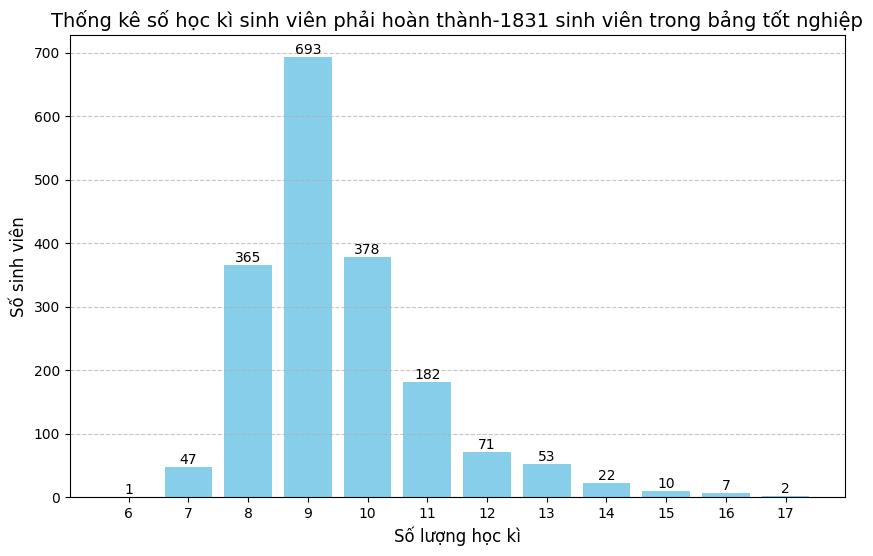

In [18]:
# Thống kê để xem phân phối các kì như thế nào
semester_count = df_sinhvien_graduated.groupby('mssv').size()
# Đếm số lượng kì mà sinh viên tham dự
semester_distribution = semester_count.value_counts().sort_index()

# Filter to only include semesters between 6 and 24
filtered_distribution = semester_distribution[(semester_distribution.index >= 6) & (semester_distribution.index <= 26)]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_distribution.index, filtered_distribution.values, color='skyblue')

# Adding labels and title
plt.xlabel('Số lượng học kì', fontsize=12)
plt.ylabel('Số sinh viên', fontsize=12)
plt.title('Thống kê số học kì sinh viên phải hoàn thành-1831 sinh viên trong bảng tốt nghiệp', fontsize=14)

# Show the chart
plt.xticks(filtered_distribution.index)  # Ensure all semester numbers are shown on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the number on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()

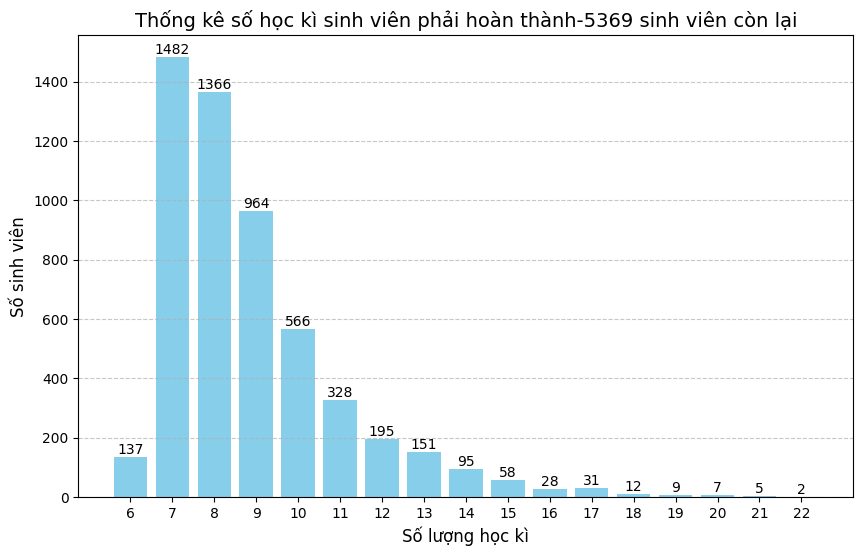

In [19]:
# Thống kê để xem phân phối các kì như thế nào
semester_count = df_sinhvien_not_graduated.groupby('mssv').size()
# Đếm số lượng kì mà sinh viên tham dự
semester_distribution = semester_count.value_counts().sort_index()

# Filter to only include semesters between 6 and 24
filtered_distribution = semester_distribution[(semester_distribution.index >= 6) & (semester_distribution.index <= 26)]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_distribution.index, filtered_distribution.values, color='skyblue')

# Adding labels and title
plt.xlabel('Số lượng học kì', fontsize=12)
plt.ylabel('Số sinh viên', fontsize=12)
plt.title('Thống kê số học kì sinh viên phải hoàn thành-5369 sinh viên còn lại', fontsize=14)

# Show the chart
plt.xticks(filtered_distribution.index)  # Ensure all semester numbers are shown on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the number on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()


**XÁC MINH LẠI SỐ TÍN CHỈ ĐỐI VỚI MỖI SINH VIÊN-5436 SINH VIÊN KHÔNG TỒN TẠI TRONG FILE TỐT NGHIỆP**

In [20]:
import csv

# Data provided in the dictionary format
criteria = {
    8: {
        'cntt': 138, 'httt': 152, 'httt_clc_tt': 140, 'khmt': 140, 'cnpm': 140, 'ktmt': 146,
        'mmt&tt': 148, 'attt': 148, 'tmdt': 145
    },
    9: {
        'cntt': 138, 'httt': 152, 'httt_clc_tt': 140, 'khmt': 140, 'cnpm': 140, 'ktmt': 146,
        'mmt&tt': 148, 'attt': 148, 'tmdt': 145
    },
    10: {
        'cntt': 138, 'httt': 152, 'httt_clc_tt': 140, 'khmt': 140, 'cnpm': 140, 'ktmt': 146,
        'mmt&tt': 148, 'attt': 148, 'tmdt': 140
    },
    11: {
        'cntt': 138, 'httt': 152, 'httt_clc_tt': 143, 'khmt': 140, 'cnpm': 152, 'ktmt': 146,
        'mmt&tt': 148, 'attt': 148, 'tmdt': 129
    },
    12: {
        'cntt': 131, 'httt': 140, 'httt_clc_tt': 143, 'khmt': 129, 'cnpm': 140, 'ktmt': 136,
        'mmt&tt': 136, 'attt': 131, 'tmdt': 133
    },
    13: {
        'cntt': 131, 'cntt_vn': 120, 'httt': 140, 'httt_clc_tt': 143, 'khmt': 129, 'cnpm': 140,
        'ktmt': 136, 'mmt&tt': 136, 'attt': 131, 'tmdt': 133, 'khdl': 123
    },
    14: {
        'cntt': 126, 'cntt_vn': 133, 'httt': 140, 'httt_clc_tt': 144, 'khmt': 127, 'cnpm': 137,
        'ktmt': 136, 'mmt&tt': 137, 'attt': 131, 'tmdt': 127, 'khdl': 122
    },
    15: {
        'cntt': 125, 'cntt_vn': 132, 'httt': 140, 'httt_clc_tt': 145, 'khmt': 126, 'cnpm': 136,
        'ktmt': 126, 'mmt&tt': 136, 'attt': 131, 'tmdt': 126, 'khdl': 121
    },
    16: {
        'cntt': 125, 'cntt_vn': 132, 'httt': 140, 'httt_clc_tt': 145, 'khmt': 126, 'cnpm': 136,
        'ktmt': 126, 'mmt&tt': 136, 'attt': 131, 'tmdt': 126, 'khdl': 121
    },
    17: {
        'cntt': 125, 'cntt_vn': 132, 'httt': 132, 'httt_clc_tt': 145, 'khmt': 126, 'ttnt': 128,
        'cnpm': 130, 'ktmt': 128, 'mmt&tt': 130, 'attt': 129, 'tmdt': 125, 'khdl': 123
    }
}

In [21]:
df_sinhvien_not_graduated = pd.read_csv(f"{DATA_PATH_FOLDER_NOT_EXIST_TOTNGHIEP}/dataset_dtb_sinhvien_reverified.csv")

In [22]:
df_sinhvien = pd.read_csv(DATA_PATH_SINHVIEN)

In [23]:
df_sinhvien_toankhoa = pd.read_excel(DATA_DTB_TOANKHOA)

In [24]:
df_sinhvien = pd.read_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/1.dataset_cleaned/01.sinhvien_cleaned.csv')

In [25]:
df_sinhvien_merge_toankhoa = pd.merge(df_sinhvien[['mssv','name_cn2','khoahoc']], df_sinhvien_toankhoa[['mssv', 'sotc_tichluy']], on='mssv', how='inner')

In [26]:
sinhvien_du_so_tin_chi = []
sinhvien_khong_du_tin_chi = []
sinhvien_can_xac_minh_them = []
sum_not_valid = 0
for index, row in df_sinhvien_merge_toankhoa.iterrows():
   if row['khoahoc'] in criteria and row['name_cn2'] in criteria[row['khoahoc']]:
       if row['sotc_tichluy'] >= criteria[row['khoahoc']][row['name_cn2']]:
           sinhvien_du_so_tin_chi.append(row)
       else:
           sinhvien_khong_du_tin_chi.append(row)
   else:
     sinhvien_can_xac_minh_them.append(row)
df1 = pd.DataFrame(sinhvien_du_so_tin_chi)
df2 = pd.DataFrame(sinhvien_khong_du_tin_chi)
df3 = pd.DataFrame(sinhvien_can_xac_minh_them)


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4916 entries, 0 to 8233
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mssv          4916 non-null   object 
 1   name_cn2      4916 non-null   object 
 2   khoahoc       4916 non-null   float64
 3   sotc_tichluy  4916 non-null   float64
dtypes: float64(2), object(2)
memory usage: 192.0+ KB


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3318 entries, 1 to 8231
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mssv          3318 non-null   object 
 1   name_cn2      3318 non-null   object 
 2   khoahoc       3318 non-null   float64
 3   sotc_tichluy  3318 non-null   float64
dtypes: float64(2), object(2)
memory usage: 129.6+ KB


In [29]:
df_sinhvien_not_graduated_valid = df_sinhvien_not_graduated[df_sinhvien_not_graduated['mssv'].isin(df1['mssv'])]

In [30]:
df_sinhvien_not_graduated_valid.sort_values(by=['mssv','namhoc','hocky'],ascending=[True,True,True],inplace = True)

<ipython-input-30-317b76a6feee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinhvien_not_graduated_valid.sort_values(by=['mssv','namhoc','hocky'],ascending=[True,True,True],inplace = True)


In [31]:
df_sinhvien_not_graduated_valid['mssv'].nunique()

3141

In [32]:
df_sinhvien_not_graduated_valid.to_csv(f'{DATA_PATH_FOLDER_NOT_EXIST_TOTNGHIEP}/valid_dataset_dtb_sinhvien_reverified.csv',index = False)

In [33]:
df_sinhvien_not_graduated_invalid = df_sinhvien_not_graduated[df_sinhvien_not_graduated['mssv'].isin(df2['mssv'])]

In [34]:
df_sinhvien_not_graduated_invalid.sort_values(by=['mssv','namhoc','hocky'],ascending=[True,True,True],inplace=True)

<ipython-input-34-d86d339aaf94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinhvien_not_graduated_invalid.sort_values(by=['mssv','namhoc','hocky'],ascending=[True,True,True],inplace=True)


In [35]:
df_sinhvien_not_graduated_invalid['mssv'].nunique()

2295

In [36]:
#df_sinhvien_not_graduated_invalid.to_csv(f'{DATA_PATH_FOLDER_NOT_EXIST_TOTNGHIEP}/invalid_dataset_dtb_sinhvien_reverified.csv',index = False)

**Đối với các sinh viên không nằm trong file tốt nghiệp và học không đủ tín chỉ, kiểm tra lại thông tin xem nếu sinh viên đó học hơn 6 năm thì cho là nhãn 4(nhãn chưa đạt)**

In [37]:
df_sinhvien_not_graduated_invalid = pd.read_csv(f'{DATA_PATH_FOLDER_NOT_EXIST_TOTNGHIEP}/invalid_dataset_dtb_sinhvien_reverified.csv')

In [38]:
#đọc lại file sinh viên để lấy năm học và niên khóa
df_sinhvien_dtb_hocky = pd.read_csv(DATA_PATH_SINHVIEN_DTB_HOCKY)

In [39]:
#df_sinhvien_khongduchi
df_sinhvien_khongduchi = pd.read_csv(f'{DATA_PATH_FOLDER_NOT_EXIST_TOTNGHIEP}/invalid_dataset_dtb_sinhvien_reverified.csv')

In [40]:
df_recheck = df_sinhvien_dtb_hocky[df_sinhvien_dtb_hocky['mssv'].isin(df_sinhvien_khongduchi['mssv'])]

In [41]:
df_recheck['mssv'].nunique()

2295

In [42]:
df_max_sinhvien = df_recheck.groupby('mssv').agg({'namhoc':'max'}).reset_index()

In [43]:
df_sinhvien = pd.read_csv(DATA_PATH_SINHVIEN)

In [44]:
df_merge = pd.merge(df_sinhvien[['mssv','khoahoc']],df_max_sinhvien,on = 'mssv',how = 'inner')

In [45]:
df_merge['nam_dang_hoc'] = df_merge['namhoc'] - df_merge['khoahoc']-2004

In [46]:
df_merge['nam_dang_hoc'].value_counts()

,count
nam_dang_hoc,
4.0,1329
5.0,474
6.0,210
3.0,168
7.0,86
8.0,21
9.0,7


In [47]:
df_student_in_678 = df_merge[df_merge['nam_dang_hoc']>=6]

In [48]:
df_sinhvien_nhanchuadat = df_sinhvien_khongduchi[df_sinhvien_khongduchi['mssv'].isin(df_student_in_678['mssv'])]

In [49]:
df_sinhvien_nhanchuadat.isnull().sum()


,0
mssv,0
hocky,0
namhoc,0
dtbhk,0
sotchk,0


In [50]:
df_sinhvien_nhanchuadat['mssv'].nunique()

324

In [51]:
df_sinhvien_nhanchuadat.to_csv(f'{DATA_PATH_FOLDER_NOT_EXIST_TOTNGHIEP}/valid_nhanchuadat_dataset_dtb_sinhvien_reverified.csv',index = False)

In [53]:
df_sinhvien_nhanchuadat['mssv'].nunique()

324

# Điểm trung bình theo học kì chuyển thành chiều ngang

In [54]:
# Fill missing semesters for a maximum of 3 semesters per year and 24 semesters
def fill_learning_process(df, max_semesters=24, semesters_per_year=3):
    filled_data = []
    for mssv, group in df.groupby("mssv"):
        # Generate the learning process
        semester_index = 1
        for year in range(group["namhoc"].min(), group["namhoc"].min() + (max_semesters // semesters_per_year)):
            for semester in range(1, semesters_per_year + 1):
                if semester_index > max_semesters:
                    break
                # Check if this year and semester exist in the data
                match = group[(group["namhoc"] == year) & (group["hocky"] == semester)]
                if not match.empty:
                    # Use existing data
                    row = match.iloc[0].to_dict()
                    row["semester_index"] = semester_index
                    filled_data.append(row)
                else:
                    # Fill with missing data
                    filled_data.append({
                        "mssv": mssv,
                        "namhoc": year,
                        "hocky": semester,
                        "dtbhk": -1,
                        "semester_index": semester_index,
                    })
                semester_index += 1
    return pd.DataFrame(filled_data)


In [55]:
df1 = pd.read_csv(f'{DATA_PATH_FOLDER_NOT_EXIST_TOTNGHIEP}/valid_dataset_dtb_sinhvien_reverified.csv')
df2= pd.read_csv(f'{DATA_PATH_FOLDER_NOT_EXIST_TOTNGHIEP}/valid_nhanchuadat_dataset_dtb_sinhvien_reverified.csv')
df3= pd.read_csv(f'{DATA_PATH_FOLDER_EXIST_TOTNGHIEP}/dataset_dtb_sinhvien.csv')

In [56]:
df_lstm = pd.concat([df1,df2,df3])

In [57]:
df_lstm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49876 entries, 0 to 17418
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mssv    49876 non-null  object 
 1   hocky   49876 non-null  int64  
 2   namhoc  49876 non-null  int64  
 3   dtbhk   49876 non-null  float64
 4   sotchk  49876 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.3+ MB


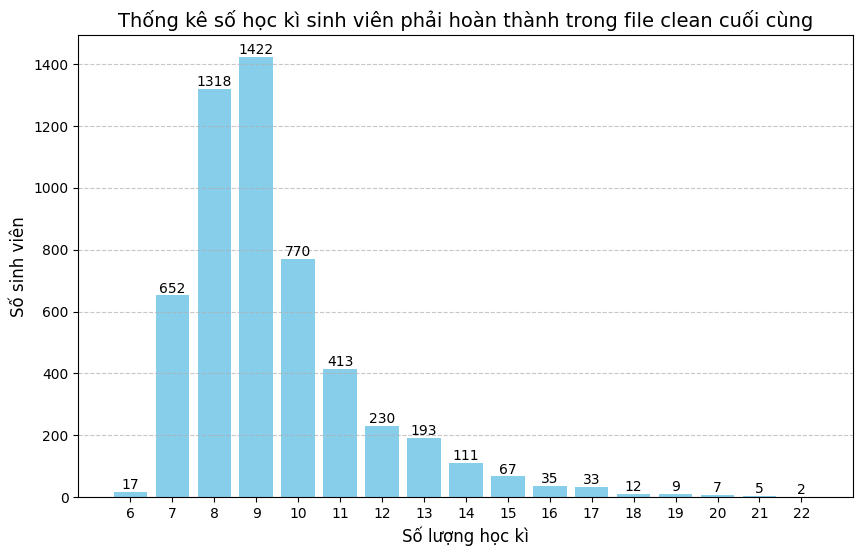

In [58]:
# Thống kê để xem phân phối các kì như thế nào
semester_count = df_lstm.groupby('mssv').size()
# Đếm số lượng kì mà sinh viên tham dự
semester_distribution = semester_count.value_counts().sort_index()

# Filter to only include semesters between 6 and 24
filtered_distribution = semester_distribution[(semester_distribution.index >= 6) & (semester_distribution.index <= 26)]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_distribution.index, filtered_distribution.values, color='skyblue')

# Adding labels and title
plt.xlabel('Số lượng học kì', fontsize=12)
plt.ylabel('Số sinh viên', fontsize=12)
plt.title('Thống kê số học kì sinh viên phải hoàn thành trong file clean cuối cùng', fontsize=14)

# Show the chart
plt.xticks(filtered_distribution.index)  # Ensure all semester numbers are shown on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the number on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()


In [59]:
df_lstm.head()

,mssv,hocky,namhoc,dtbhk,sotchk
0,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,1,2019,8.84,17
1,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,2,2019,9.00,21
2,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,1,2020,9.11,15
3,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,2,2020,8.75,19
4,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,1,2021,8.54,20


In [60]:
#scaled diem trung binh toan khoa
df_lstm["dtbhk"] = (df_lstm["dtbhk"] - df_lstm["dtbhk"].min()) / (df_lstm["dtbhk"].max() - df_lstm["dtbhk"].min())

In [61]:
df_lstm.head()

,mssv,hocky,namhoc,dtbhk,sotchk
0,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,1,2019,0.884,17
1,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,2,2019,0.900,21
2,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,1,2020,0.911,15
3,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,2,2020,0.875,19
4,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,1,2021,0.854,20


In [62]:
df_filled = fill_learning_process(df_lstm)

In [63]:
df_filled = df_filled[df_filled['semester_index']<=22]

In [64]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116512 entries, 0 to 127101
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mssv            116512 non-null  object 
 1   hocky           116512 non-null  int64  
 2   namhoc          116512 non-null  int64  
 3   dtbhk           116512 non-null  float64
 4   sotchk          49827 non-null   float64
 5   semester_index  116512 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 6.2+ MB


In [65]:
df_filled.head()

,mssv,hocky,namhoc,dtbhk,sotchk,semester_index
0,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,1,2019,0.884,17.0,1
1,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,2,2019,0.900,21.0,2
2,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,3,2019,-1.000,NaN,3
3,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,1,2020,0.911,15.0,4
4,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,2,2020,0.875,19.0,5


In [66]:
# Pivot the DataFrame to make it horizontal
pivot_df = df_filled.pivot(index="mssv", columns="semester_index", values="dtbhk")


# Rename columns for clarity
pivot_df = pivot_df.rename(columns=lambda x: f"sem{x}" if isinstance(x, int) else x)

# Handle missing values (optional)
pivot_df = pivot_df.fillna(0)

# Reset index to include `mssv` as a column (optional)
pivot_df = pivot_df.reset_index()

In [67]:
pivot_df.head()

semester_index,mssv,sem1,sem2,sem3,sem4,sem5,sem6,sem7,sem8,sem9,...,sem13,sem14,sem15,sem16,sem17,sem18,sem19,sem20,sem21,sem22
0,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,0.884,0.900,-1.000,0.911,0.875,-1.00,0.854,0.874,-1.0,...,-1.00,-1.000,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,0.541,0.707,0.775,0.636,0.832,-1.00,0.786,0.809,-1.0,...,0.82,-1.000,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0013D6E5XPvAibaEXe85hkLGQAJy3XgK9pA18A31,0.831,0.814,-1.000,0.701,0.787,-1.00,0.804,0.889,-1.0,...,-1.00,-1.000,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,0018C59CXPvAibaEXe8C3lblh2dNniH+SYgLosUA,0.796,0.804,0.000,0.691,0.849,-1.00,0.885,0.740,-1.0,...,-1.00,-1.000,-1.0,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,001E045BXPvAibaEXe+n07P56kWx2N6EoOCUJBA4,0.658,0.190,-1.000,0.716,0.333,0.38,0.110,0.627,-1.0,...,0.71,0.407,-1.0,0.475,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


**Đọc file drl clean**

In [68]:
df_drl_clean = pd.read_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/1.dataset_cleaned/drl_pivot.csv')

In [69]:
df_drl_clean.head()

,mssv,term 1,term 2,term 3,term 4,term 5,term 6,term 7,term 8,term 9,term 10,term 11,term 12,term 13,term 14,term 15,term 16
0,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,100,100,100,100,100,100,100,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,81,76,76,75,75,91,77,71,64,70,76,70,-1,-1,-1,-1
2,000AD0D8XPvAibaEXe+RQyZpP6sq6qqIPZXybx3Q,85,100,96,100,100,90,86,84,58,-1,-1,-1,-1,-1,-1,-1
3,0013D6E5XPvAibaEXe85hkLGQAJy3XgK9pA18A31,90,95,100,79,88,100,100,86,-1,-1,-1,-1,-1,-1,-1,-1
4,001BB05EXPvAibaEXe/YKAlYnC3m92BzM+VhZyc0,59,76,76,75,75,48,25,23,-1,-1,-1,-1,-1,-1,-1,-1


In [70]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [71]:
# Identify term columns
term_columns = [col for col in df_drl_clean.columns if col.startswith('term')]

# Function to apply Min-Max scaling while ignoring -1
def min_max_scale_ignore_negatives(series):
    valid_values = series[series != -1]
    if valid_values.empty:
        return series
    min_val, max_val = valid_values.min(), valid_values.max()
    scaled = series.apply(lambda x: (x - min_val) / (max_val - min_val) if x != -1 else -1)
    return scaled

# Apply the scaling function to each column
for col in term_columns:
    df_drl_clean[col] = min_max_scale_ignore_negatives(df_drl_clean[col])

# Display the scaled DataFrame
df_drl_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9555 entries, 0 to 9554
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mssv     9555 non-null   object 
 1   term 1   9555 non-null   float64
 2   term 2   9555 non-null   float64
 3   term 3   9555 non-null   float64
 4   term 4   9555 non-null   float64
 5   term 5   9555 non-null   float64
 6   term 6   9555 non-null   float64
 7   term 7   9555 non-null   float64
 8   term 8   9555 non-null   float64
 9   term 9   9555 non-null   float64
 10  term 10  9555 non-null   float64
 11  term 11  9555 non-null   float64
 12  term 12  9555 non-null   float64
 13  term 13  9555 non-null   float64
 14  term 14  9555 non-null   float64
 15  term 15  9555 non-null   float64
 16  term 16  9555 non-null   float64
dtypes: float64(16), object(1)
memory usage: 1.2+ MB


In [72]:
df_drl_clean.head()

,mssv,term 1,term 2,term 3,term 4,term 5,term 6,term 7,term 8,term 9,term 10,term 11,term 12,term 13,term 14,term 15,term 16
0,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-1.00,-1.00,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0
1,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,0.81,0.76,0.76,0.75,0.75,0.91,0.77,0.71,0.64,0.7,0.7,0.714286,-1.0,-1.0,-1.0,-1.0
2,000AD0D8XPvAibaEXe+RQyZpP6sq6qqIPZXybx3Q,0.85,1.00,0.96,1.00,1.00,0.90,0.86,0.84,0.58,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0
3,0013D6E5XPvAibaEXe85hkLGQAJy3XgK9pA18A31,0.90,0.95,1.00,0.79,0.88,1.00,1.00,0.86,-1.00,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0
4,001BB05EXPvAibaEXe/YKAlYnC3m92BzM+VhZyc0,0.59,0.76,0.76,0.75,0.75,0.48,0.25,0.23,-1.00,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0


In [73]:
df_merge = pd.merge(pivot_df,df_drl_clean,on = 'mssv',how = 'inner')

In [74]:
df_merge.head()

,mssv,sem1,sem2,sem3,sem4,sem5,sem6,sem7,sem8,sem9,...,term 7,term 8,term 9,term 10,term 11,term 12,term 13,term 14,term 15,term 16
0,0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G,0.884,0.900,-1.000,0.911,0.875,-1.00,0.854,0.874,-1.0,...,1.00,-1.00,-1.00,-1.00,-1.000,-1.000000,-1.0,-1.0,-1.0,-1.0
1,00046394XPvAibaEXe+fmxcqgvribEcT4YmJhSFD,0.541,0.707,0.775,0.636,0.832,-1.00,0.786,0.809,-1.0,...,0.77,0.71,0.64,0.70,0.700,0.714286,-1.0,-1.0,-1.0,-1.0
2,0013D6E5XPvAibaEXe85hkLGQAJy3XgK9pA18A31,0.831,0.814,-1.000,0.701,0.787,-1.00,0.804,0.889,-1.0,...,1.00,0.86,-1.00,-1.00,-1.000,-1.000000,-1.0,-1.0,-1.0,-1.0
3,001E045BXPvAibaEXe+n07P56kWx2N6EoOCUJBA4,0.658,0.190,-1.000,0.716,0.333,0.38,0.110,0.627,-1.0,...,0.70,0.66,0.84,0.66,0.475,-1.000000,-1.0,-1.0,-1.0,-1.0
4,00256CA6XPvAibaEXe9ZBnO1fewQMfc0mu/9tLFg,0.821,0.934,-1.000,0.793,0.792,-1.00,0.889,0.863,-1.0,...,1.00,-1.00,-1.00,-1.00,-1.000,-1.000000,-1.0,-1.0,-1.0,-1.0


In [75]:
df_merge.to_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/3.data_processing/data-final/lstm_data/lstm_data.csv',index = False)